In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor

In [2]:
CV_limit = 0.5

In [3]:
enum_times = [
 '3wk',
 '4wkTC',
 '4wkAB',
 '6wkTC',
 '6wkAB',
 '8wkTC',
 '8wkAB',
 '10wkTC',
 '10wkAB']

In [4]:
enum_times_TC = [
 '3wk',
 '4wkTC',
 '6wkTC',
 '8wkTC',
 '10wkTC']

In [5]:
enum_times_AB = [
 '3wk',
 '4wkAB',
 '6wkAB',
 '8wkAB',
 '10wkAB']

In [6]:
mb = pd.read_hdf("data/generated/biom_ts.hdf5", "CV" + str(CV_limit).replace('.', ''))

In [7]:
label = pd.read_hdf("data/generated/label_ts.hd5", "default")

In [8]:
print("Using {} metabolome and {} bacteria data".format(len(mb), len(label)))

Using 135 metabolome and 62 bacteria data


In [9]:
mb_TC = mb.filter(enum_times_TC)
mb_AB = mb.filter(enum_times_AB)
label_TC = label.filter(enum_times_TC)
label_AB = label.filter(enum_times_AB)

In [10]:
mb_np = mb.to_numpy()[:, 1:].astype(float)
label_np = label.to_numpy()[:, 1:].astype(float)

In [11]:
mb_TC_np = mb_TC.to_numpy().astype(float)
mb_AB_np = mb_AB.to_numpy().astype(float)
label_TC_np = label_TC.to_numpy().astype(float)
label_AB_np = label_AB.to_numpy().astype(float)

In [12]:
scores = []
scores_AB = []
scores_TC = []

In [13]:
def fit(a):
    if a == 'o':
        label_np_a = label_np
        mb_np_a = mb_np
        scores_a = scores
    if a == 'tc':
        label_np_a = label_TC_np
        mb_np_a = mb_TC_np
        scores_a = scores_TC
    if a == 'ab':
        label_np_a = label_AB_np
        mb_np_a = mb_AB_np
        scores_a = scores_AB
    for i in range(mb_np_a.shape[0]):
        for j in range(label_np_a.shape[0]):
            regressor = RandomForestRegressor(oob_score=True)
            regressor.fit((mb_np_a[i, :]/np.linalg.norm(mb_np_a[i, :])).reshape(-1, 1), label_np_a[j, :]/np.linalg.norm(label_np_a[j, :]))
            scores_a.append([str([i, j]), regressor.score((mb_np_a[i, :]/np.linalg.norm(mb_np_a[i, :])).reshape(-1, 1), label_np_a[j, :]/np.linalg.norm(label_np_a[j, :]))])
        print(" {} ".format(i), end="")

In [14]:
def plot0(i, j, a):
    if a == 'o':
        label_np_a = label_np
        mb_np_a = mb_np
        enum_times_a = enum_times
    if a == 'tc':
        label_np_a = label_TC_np
        mb_np_a = mb_TC_np
        enum_times_a = enum_times_TC
    if a == 'ab':
        label_np_a = label_AB_np
        mb_np_a = mb_AB_np
        enum_times_a = enum_times_AB
    pyplot.plot(enum_times_a, mb_np_a[i, :].astype(float)/np.linalg.norm(mb_np_a[i, :].astype(float)))
    pyplot.plot(enum_times_a, label_np_a[j, :]/np.linalg.norm(label_np_a[j, :]))

In [15]:
fit('ab')

 0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134 

In [16]:
# fit('tc')

In [17]:
# fit('o')

In [18]:
# scores_np = np.array(scores)
# np.flip(scores_np[abs(scores_np[:, 1].astype(float)).argsort()])[:5]

In [19]:
scores_np = np.array(scores_AB)
np.flip(scores_np[abs(scores_np[:, 1].astype(float)).argsort()])[:5]

array([['0.9955324517595615', '[118, 39]'],
       ['0.9943245970663471', '[102, 39]'],
       ['0.9930089075026134', '[96, 14]'],
       ['0.9919235498409035', '[120, 39]'],
       ['0.9918844040609086', '[31, 39]']], dtype='<U32')

In [20]:
scores_np = np.array(scores_AB)
m, b = np.flip(scores_np[abs(scores_np[:, 1].astype(float)).argsort()])[0][1].replace('[',
                                                                               '').replace(']',
                                                                                           '').split(',')
m, b = int(m), int(b)

In [21]:
# scores_np = np.array(scores_TC)
# np.flip(scores_np[abs(scores_np[:, 1].astype(float)).argsort()])[:5]

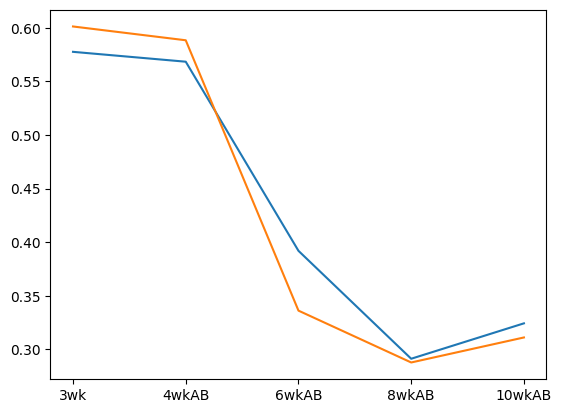

In [22]:
plot0(m, b, 'ab')

In [23]:
mb.iloc[m]

Metabolites    1-Palmitoyl-2-azelaoylphosphatidylcholine
3wk                                   14862.295966666667
4wkTC                                 17112.819252705627
4wkAB                                   14625.3829047619
6wkTC                                 10307.622624999998
6wkAB                                 10085.773944444432
8wkTC                                   18309.7254040404
8wkAB                                  7495.439444444445
10wkTC                                 9554.625422222221
10wkAB                                 8345.242250000001
Name: 118, dtype: object

In [27]:
label.iloc[b]

index     Ruminiclostridium
3wk                 1.02454
4wkTC              2.145864
4wkAB              1.002615
6wkTC              1.556577
6wkAB              0.572853
8wkTC               0.97037
8wkAB              0.490438
10wkTC             1.083369
10wkAB             0.530202
Name: 326, dtype: object